In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
balloon_clicks_default = [23, 19, 16, 22, 5, 22, 28, 18, 14, 7, 15, 14, 4, 18, 17, 7, 4, 18, 14, 10, 25, 9, 13, 19, 26, 17, 9, 6, 15, 17
, 16, 27, 14, 10, 4, 18, 15, 9, 16, 8, 5, 20, 12, 30, 24, 5, 17, 18, 6, 26]
len(balloon_clicks_default)

50

In [3]:
balloon = pd.read_excel("C:\\Users\\User\\Downloads\\ZYVO\\game\\Prolific_01.xlsx",sheetname='Balloon',header=0)
#balloon[['Sequence','Score']].iloc[[4,9,12,15,16,18,19,21,26,27,34,40,45,49]]

### Zero Score Count

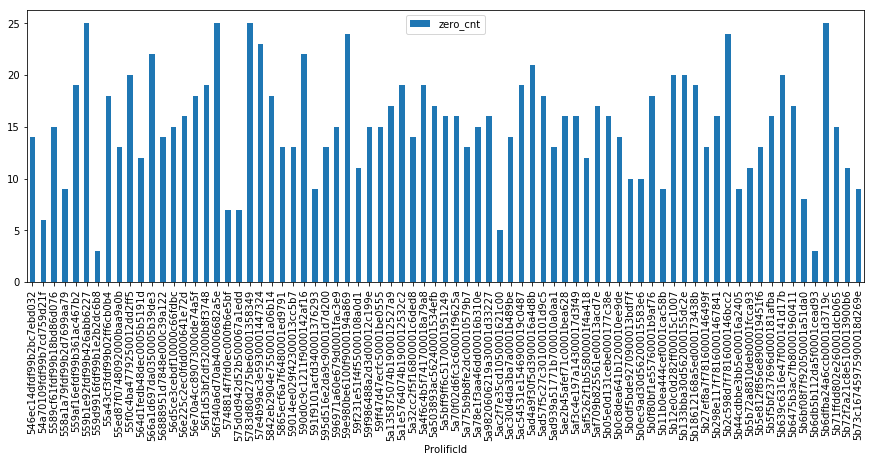

In [4]:
balloon_zero_score = balloon[balloon['Score']==0][['ProlificId','Score']]
balloon_zero_cnt = pd.DataFrame({'zero_cnt': balloon_zero_score.groupby('ProlificId')['Score'].count()}).reset_index()
fig = balloon_zero_cnt.plot.bar(x=balloon_zero_cnt['ProlificId'])
fig = plt.gcf()

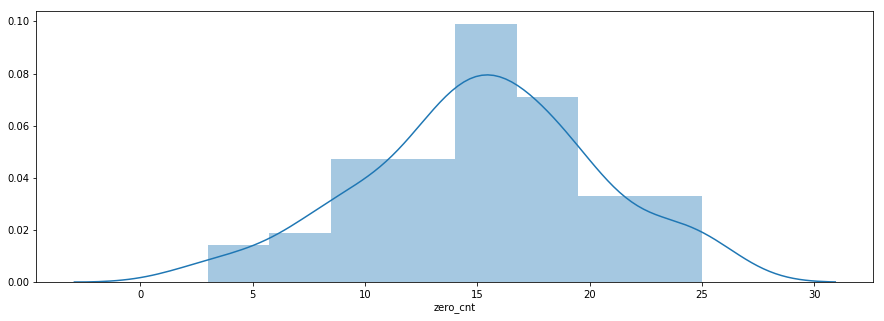

In [5]:
sns.distplot(balloon_zero_cnt['zero_cnt'])
fig = plt.gcf()

In [5]:
balloon['row_num'] = list(range(0,balloon.shape[0]))
balloon['Score'] = balloon.apply(lambda x : x.Score if(x.Score!=0) else balloon_clicks_default[x.row_num%50], axis=1)
#balloon[['Sequence','Score']].iloc[[4,9,12,15,16,18,19,21,26,27,34,40,45,49]]

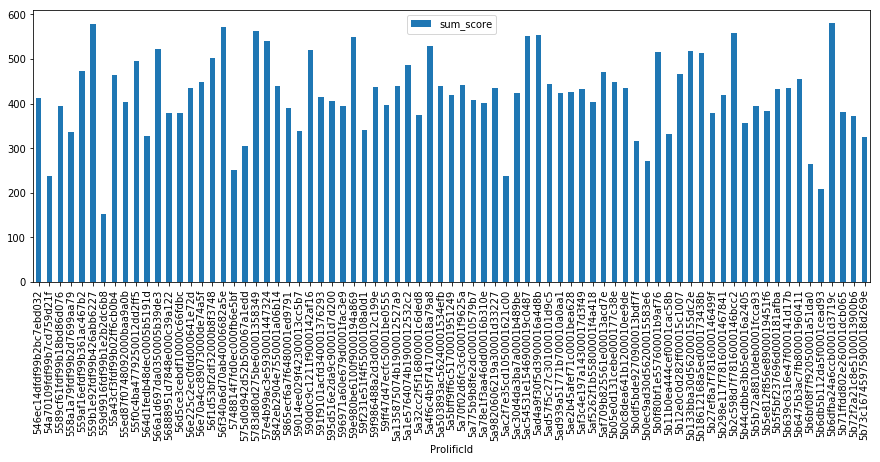

In [6]:
sum_of_score = pd.DataFrame({'sum_score' : balloon.groupby('ProlificId')['Score'].sum()}).reset_index()
fig = sum_of_score.plot.bar(x=sum_of_score['ProlificId'])
fig = plt.gcf()

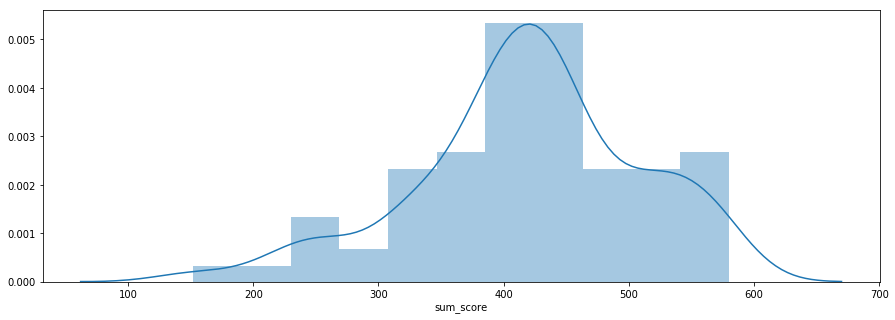

In [7]:
sns.distplot(sum_of_score['sum_score'])
fig = plt.gcf()